In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing 
from sklearn.preprocessing import StandardScaler

#spliting the data
from sklearn.model_selection import train_test_split

# importing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#evalution matrics
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [4]:
df.shape

(25000, 3)

In [5]:
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [6]:
#converting weight pounds to kg
df['Weight_kg']=df['Weight(Pounds)']*0.453592  

# Convert inches to the desired format (feet.inches) 
df['Height(Feet.Inches)'] = df['Height(Inches)'] // 12 + (df['Height(Inches)'] % 12) / 10

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,25000.0,12500.500000,7217.022701,1.000000,6250.750000,12500.500000,18750.250000,25000.000000
Height(Inches),25000.0,67.993114,1.901679,60.278360,66.704397,67.995700,69.272958,75.152800
Weight(Pounds),25000.0,127.079421,11.660898,78.014760,119.308675,127.157750,134.892850,170.924000
Weight_kg,25000.0,57.642209,5.289290,35.386871,54.117461,57.677738,61.186318,77.529759
Height(Feet.Inches),25000.0,5.795967,0.183513,5.027836,5.670440,5.799570,5.927296,6.315280


In [8]:
df=df.iloc[:,3:5]

In [9]:
df.head()

,Weight_kg,Height(Feet.Inches)
0,51.252494,5.578331
1,61.909547,6.151521
2,69.411778,5.939874
3,64.562199,5.821660
4,65.452010,5.778781


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight_kg,25000.0,57.642209,5.289290,35.386871,54.117461,57.677738,61.186318,77.529759
Height(Feet.Inches),25000.0,5.795967,0.183513,5.027836,5.670440,5.799570,5.927296,6.315280


In [11]:
df.sample(3)

,Weight_kg,Height(Feet.Inches)
10942,67.987181,6.081098
636,48.962580,5.530204
6100,51.212669,5.743419


In [12]:
df.isna().any()

Weight_kg              False
Height(Feet.Inches)    False
dtype: bool

In [13]:
df.dtypes

Weight_kg              float64
Height(Feet.Inches)    float64
dtype: object

In [14]:
df.corr()

,Weight_kg,Height(Feet.Inches)
Weight_kg,1.000000,0.499192
Height(Feet.Inches),0.499192,1.000000


<Axes: >

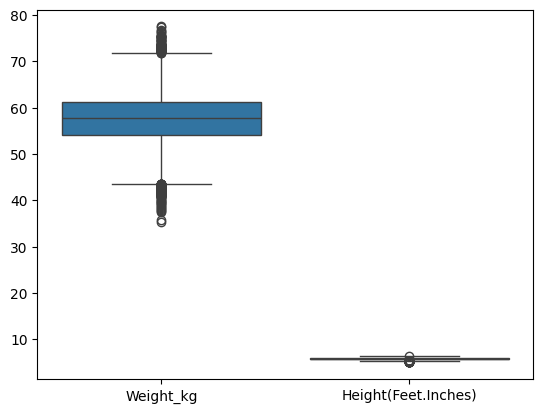

In [15]:
sns.boxplot(data=df)

In [16]:
df.columns

Index(['Weight_kg', 'Height(Feet.Inches)'], dtype='object')

<Axes: xlabel='Weight_kg'>

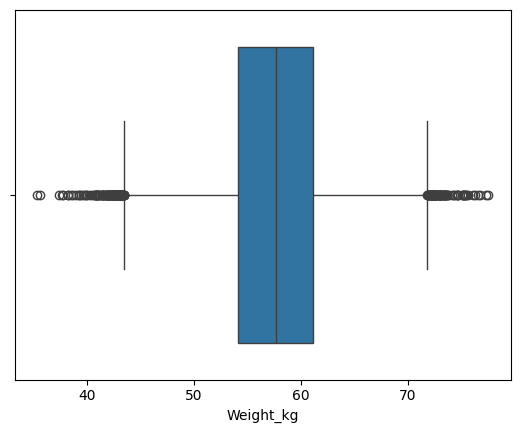

In [17]:
sns.boxplot(x=df['Weight_kg'])


<Axes: xlabel='Height(Feet.Inches)'>

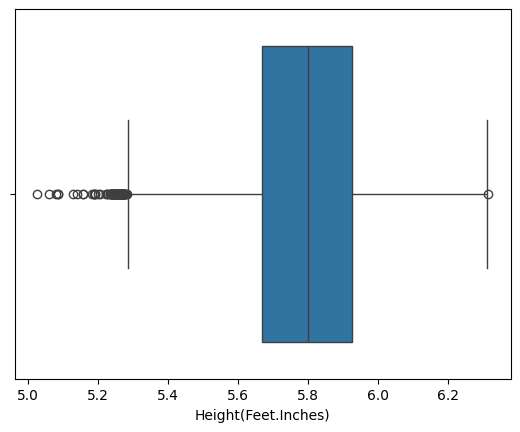

In [18]:
sns.boxplot(x=df['Height(Feet.Inches)'])

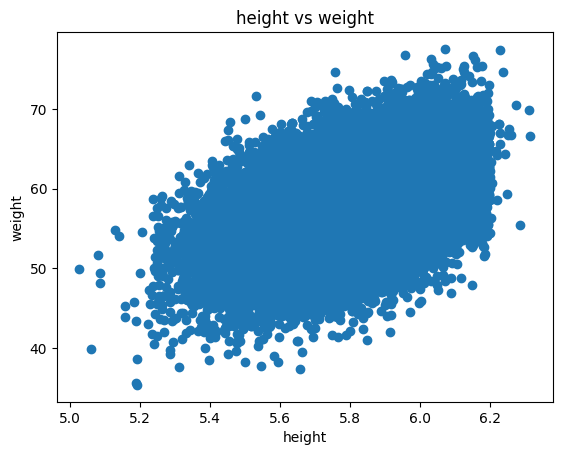

In [19]:
plt.scatter(x=df['Height(Feet.Inches)'],y=df['Weight_kg'])
plt.title("height vs weight")
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [20]:
df.head()

,Weight_kg,Height(Feet.Inches)
0,51.252494,5.578331
1,61.909547,6.151521
2,69.411778,5.939874
3,64.562199,5.821660
4,65.452010,5.778781


In [21]:
X=df.iloc[:,1:2]
X

,Height(Feet.Inches)
0,5.578331
1,6.151521
2,5.939874
3,5.821660
4,5.778781
...,...
24995,5.950215
24996,5.454826
24997,5.469855
24998,5.752918


In [22]:
y=df.iloc[:,0]
y

0        51.252494
1        61.909547
2        69.411778
3        64.562199
4        65.452010
           ...    
24995    53.538008
24996    54.518674
24997    53.644285
24998    59.995797
24999    56.641938
Name: Weight_kg, Length: 25000, dtype: float64

In [29]:
scaler=StandardScaler()

scaler_X=scaler.fit_transform(X.values)

scaler_y=scaler.transform(y.values.reshape(-1,1))

scaler_X


array([[-1.18597032],
       [ 1.93752581],
       [ 0.78419343],
       ...,
       [-1.77709083],
       [-0.23458977],
       [ 0.50021298]])

In [30]:
scaler_y

array([[247.70719182],
       [305.78089307],
       [346.66295162],
       ...,
       [260.74082593],
       [295.35225554],
       [277.07600092]])

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
X_train

,Height(Feet.Inches)
10263,5.746994
18409,5.650874
13047,5.939596
21371,5.645704
16392,5.819583
...,...
13123,5.775147
19648,5.737382
9845,5.393049
10799,5.697528


In [36]:
X_train2d=X_train.values
X_train2d

array([[5.746994],
       [5.650874],
       [5.939596],
       ...,
       [5.393049],
       [5.697528],
       [5.977321]])

In [39]:
X_test2d=X_test.values
X_test2d

array([[5.675233],
       [6.023626],
       [5.719022],
       ...,
       [5.751801],
       [5.906944],
       [5.665813]])

In [42]:
y_train2d=y_train.values
y_train2d

array([55.27481184, 60.21207004, 59.82356849, ..., 49.14936939,
       60.68929418, 65.15776505])

In [45]:
y_test2d=y_test.values
y_test2d

array([60.87349789, 64.25661383, 50.63170805, ..., 60.41863584,
       72.55585057, 58.02961213])

In [46]:
lr=LinearRegression()

In [48]:
lr.fit(X_train2d,y_train2d)

LinearRegression()

In [50]:
y_pred=lr.predict(X_test2d)
y_pred

array([55.94425481, 60.91226889, 56.56867714, ..., 57.03609908,
       59.24840705, 55.8099275 ])

In [53]:
y_pred[:10]

array([55.94425481, 60.91226889, 56.56867714, 56.42643564, 51.52547113,
       52.93798976, 60.30463034, 60.27256006, 62.74472434, 63.0616341 ])

In [54]:
y_test2d[:10]

array([60.87349789, 64.25661383, 50.63170805, 53.62895327, 46.5397639 ,
       48.20970821, 55.81821505, 55.03481631, 76.60307055, 55.98708736])

In [55]:
mean_squared_error(y_pred,y_test2d)

np.float64(21.69730652290755)

In [56]:
model_dtr=DecisionTreeRegressor()
model_dtr

DecisionTreeRegressor()

In [59]:
model_dtr.fit(X_train2d ,y_train2d)

DecisionTreeRegressor()

In [62]:

y_pred_dtr=model_dtr.predict(X_test2d)

In [63]:
y_pred_dtr[:10]

array([63.37542065, 56.46639802, 56.7162365 , 64.71347169, 57.84078178,
       55.64920668, 63.98391432, 61.98048917, 61.30032797, 67.3051603 ])

In [64]:
y_test2d[:10]

array([60.87349789, 64.25661383, 50.63170805, 53.62895327, 46.5397639 ,
       48.20970821, 55.81821505, 55.03481631, 76.60307055, 55.98708736])

In [65]:
mean_squared_error(y_pred_dtr,y_test)

np.float64(41.50751860513505)

In [67]:
model_rfr=RandomForestRegressor()
model_rfr.fit(X_train2d,y_train2d)

RandomForestRegressor()

In [68]:
y_pred_rfr=(X_test2d)
y_pred_rfr[:10]

array([[5.675233],
       [6.023626],
       [5.719022],
       [5.709047],
       [5.365356],
       [5.464412],
       [5.981014],
       [5.978765],
       [6.152131],
       [6.174355]])

In [70]:
mean_squared_error(y_pred_rfr,y_test2d)

np.float64(2708.30376658499)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Create a Linear Regression model
model_lr = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train2d, y_train2d)

# Print the best parameters and best MSE score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE Score:", grid_search.best_score_)


Best Parameters: {'copy_X': True, 'fit_intercept': True}
Best Negative MSE Score: -20.836260216566203


In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_lr = LinearRegression()

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(model_lr, X_train2d, y_train2d, cv=10, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive
mse_scores = -accuracy_scores

# Print the MSE scores
print("MSE Scores:", mse_scores)

MSE Scores: [21.65411512 21.79844701 20.33072238 21.2128048  21.84713487 20.47547042
 20.38317103 20.4544885  21.45193422 18.76081422]


In [76]:
#final model
from sklearn.linear_model import LinearRegression

final_model=LinearRegression(fit_intercept=False,copy_X=True)

final_model.fit(X_train2d,y_train2d)

LinearRegression(fit_intercept=False)

In [80]:
import pickle 

with open("final_model.pkl","wb")as file:
    pickle .dump(final_model,file)
